<a href="https://colab.research.google.com/github/schmeks/911-311_Complaints/blob/master/911_311_Complaint_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python 225 Final Project**
Becca Mason

This collab notebook takes NYPD Historic Complaint Data and Explores the content with preliminary analyses.

Data Pull

First, pull complaint data from NYC Open Data via Socrata API and filter down to Violations only

In [43]:
# https://data.cityofnewyork.us/resource/qgea-i56i.json
!pip install sodapy

import pandas as pd
from sodapy import Socrata
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

In [0]:
# First 100k results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("qgea-i56i")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

Data Manipulation

In [46]:
# Create a copy and make cmplnt_num the index
complaints_df = results_df.copy()
complaints_df.set_index('cmplnt_num', inplace = True)

complaints_df.head()

,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,prem_typ_desc,juris_desc,jurisdiction_code,parks_nm,housing_psa,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon,patrol_boro,vic_age_group,vic_race,vic_sex,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,cmplnt_to_dt,cmplnt_to_tm,loc_of_occur_desc,susp_race,susp_sex,susp_age_group,transit_district,station_name,hadevelopt
cmplnt_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
876525802,2008-04-10T00:00:00.000,19:10:00,73,2008-04-10T00:00:00.000,341,PETIT LARCENY,321,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,0,NA,NA,1008495,183171,40.669413836,-73.91260308,"{'latitude': '40.669413836', 'longitude': '-73...",PATROL BORO BKLYN NORTH,18-24,BLACK,M,17614,55,2,17,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402693528,2007-06-03T00:00:00.000,15:23:00,28,2007-06-03T00:00:00.000,236,DANGEROUS WEAPONS,782,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,MANHATTAN,STREET,N.Y. POLICE DEPT,0,NA,NA,999336,231461,40.801978284,-73.945511151,"{'latitude': '40.801978284', 'longitude': '-73...",PATROL BORO MAN NORTH,NaN,UNKNOWN,E,13093,18,4,36,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832030069,2010-02-16T00:00:00.000,20:50:00,102,2010-02-16T00:00:00.000,105,ROBBERY,375,"ROBBERY,PHARMACY",COMPLETED,FELONY,QUEENS,GROCERY/BODEGA,N.Y. POLICE DEPT,0,NA,NA,1031117,194344,40.699990268,-73.830977746,"{'latitude': '40.699990268', 'longitude': '-73...",PATROL BORO QUEENS SOUTH,NaN,UNKNOWN,D,24014,46,3,28,60,2010-02-16T00:00:00.000,20:50:00,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN
538308771,2009-11-10T00:00:00.000,16:35:00,79,2009-11-10T00:00:00.000,341,PETIT LARCENY,333,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,FOOD SUPERMARKET,N.Y. POLICE DEPT,0,NA,NA,996722,187385,40.681004729,-73.955034577,"{'latitude': '40.681004729', 'longitude': '-73...",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,D,17618,69,2,49,51,2009-11-10T00:00:00.000,16:45:00,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN
965693192,2006-04-11T00:00:00.000,09:30:00,123,2006-04-25T00:00:00.000,112,THEFT-FRAUD,739,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,STATEN ISLAND,COMMERCIAL BUILDING,N.Y. POLICE DEPT,0,NA,NA,NaN,NaN,NaN,NaN,NaN,PATROL BORO STATEN ISLAND,25-44,WHITE,M,NaN,NaN,NaN,NaN,NaN,2006-04-11T00:00:00.000,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Cut down data just to law_cat_cd = VIOLATION

violations = complaints_df[complaints_df['law_cat_cd'] == "VIOLATION"].copy()
sorted_violations = violations.sort_values(by = ["rpt_dt"], ascending = False)
sorted_violations.head()

,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,prem_typ_desc,juris_desc,jurisdiction_code,parks_nm,housing_psa,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon,patrol_boro,vic_age_group,vic_race,vic_sex,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,cmplnt_to_dt,cmplnt_to_tm,loc_of_occur_desc,susp_race,susp_sex,susp_age_group,transit_district,station_name,hadevelopt
cmplnt_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
265082929,2011-12-06T00:00:00.000,13:00:00,105,2011-12-16T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,STREET,N.Y. POLICE DEPT,0,NA,NA,1054980,205316,40.729947108,-73.74480205,"{'latitude': '40.729947108', 'longitude': '-73...",PATROL BORO QUEENS SOUTH,<18,WHITE HISPANIC,M,24336,63,3,16,63,2011-12-06T00:00:00.000,13:15:00,NaN,BLACK,M,NaN,NaN,NaN,NaN
501068786,2011-11-23T00:00:00.000,18:50:00,101,2011-11-23T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,STREET,N.Y. POLICE DEPT,0,NA,NA,1052559,159711,40.604791059,-73.753999254,"{'latitude': '40.604791059', 'longitude': '-73...",PATROL BORO QUEENS SOUTH,45-64,BLACK,F,20529,51,3,47,59,NaN,NaN,NaN,BLACK,M,NaN,NaN,NaN,NaN
525379766,2011-11-04T00:00:00.000,19:00:00,49,2011-11-07T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,STREET,N.Y. POLICE DEPT,0,NA,NA,1023609,255034,40.866604513,-73.8576994,"{'latitude': '40.866604513', 'longitude': '-73...",PATROL BORO BRONX,25-44,BLACK,F,11607,59,5,12,32,NaN,NaN,FRONT OF,BLACK,M,NaN,NaN,NaN,NaN
175993009,2011-08-23T00:00:00.000,19:50:00,40,2011-08-23T00:00:00.000,578,HARRASSMENT 2,637,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BRONX,STREET,N.Y. POLICE DEPT,0,NA,NA,1004369,237509,40.818568337,-73.927313946,"{'latitude': '40.818568337', 'longitude': '-73...",PATROL BORO BRONX,18-24,BLACK,F,10929,50,5,35,27,NaN,NaN,NaN,BLACK,M,25-44,NaN,NaN,NaN
741628351,2011-07-10T00:00:00.000,11:00:00,73,2011-07-10T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,STREET,N.Y. POLICE DEPT,0,NA,NA,1010145,180217,40.661301092,-73.906666511,"{'latitude': '40.661301092', 'longitude': '-73...",PATROL BORO BKLYN NORTH,25-44,BLACK,F,17614,55,2,25,46,NaN,NaN,NaN,BLACK,M,45-64,NaN,NaN,NaN


# Data Analysis

In [48]:
# See date breakdown of data
print(min(violations.rpt_dt))
print(max(violations.rpt_dt))

2006-01-05T00:00:00.000
2011-12-16T00:00:00.000


Now, learn more about the characteristics of the complaints, including victim characteristics and suspect characteristics.

In [49]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 730205151 to 900067061
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cmplnt_fr_dt                 103 non-null    object
 1   cmplnt_fr_tm                 103 non-null    object
 2   addr_pct_cd                  103 non-null    object
 3   rpt_dt                       103 non-null    object
 4   ky_cd                        103 non-null    object
 5   ofns_desc                    103 non-null    object
 6   pd_cd                        103 non-null    object
 7   pd_desc                      103 non-null    object
 8   crm_atpt_cptd_cd             103 non-null    object
 9   law_cat_cd                   103 non-null    object
 10  boro_nm                      103 non-null    object
 11  prem_typ_desc                103 non-null    object
 12  juris_desc                   103 non-null    object
 13  jurisdiction_code         

In [50]:
# Total number of violations
violations["ofns_desc"].value_counts()

HARRASSMENT 2              101
ADMINISTRATIVE CODE          1
MISCELLANEOUS PENAL LAW      1
Name: ofns_desc, dtype: int64

In [51]:
# Types of violations
violations["pd_desc"].value_counts()

HARASSMENT,SUBD 3,4,5         58
HARASSMENT,SUBD 1,CIVILIAN    43
IMITATION PISTOL/AIR RIFLE     1
MARIJUANA, POSSESSION          1
Name: pd_desc, dtype: int64

In [52]:
# Violations by report year
import datetime

violations["rpt_dt_yr"] = pd.DatetimeIndex(violations["rpt_dt"]).year
violations.head()

,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,prem_typ_desc,juris_desc,jurisdiction_code,parks_nm,housing_psa,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon,patrol_boro,vic_age_group,vic_race,vic_sex,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,cmplnt_to_dt,cmplnt_to_tm,loc_of_occur_desc,susp_race,susp_sex,susp_age_group,transit_district,station_name,hadevelopt,rpt_dt_yr
cmplnt_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
730205151,2007-05-14T00:00:00.000,10:00:00,46,2007-05-14T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,OTHER,N.Y. POLICE DEPT,0,NA,NA,1013045,252933,40.860878686,-73.895902416,"{'latitude': '40.860878686', 'longitude': '-73...",PATROL BORO BRONX,25-44,BLACK,F,10936,6,5,22,29,NaN,NaN,INSIDE,NaN,NaN,NaN,NaN,NaN,NaN,2007
975331489,2006-04-09T00:00:00.000,15:52:00,42,2006-04-09T00:00:00.000,578,HARRASSMENT 2,637,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BRONX,STREET,N.Y. POLICE DEPT,0,NA,NA,NaN,NaN,NaN,NaN,NaN,PATROL BORO BRONX,45-64,BLACK,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT OF,BLACK,M,25-44,NaN,NaN,NaN,2006
367892768,2005-12-12T00:00:00.000,11:45:00,94,2006-01-05T00:00:00.000,578,HARRASSMENT 2,637,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BROOKLYN,PUBLIC SCHOOL,N.Y. POLICE DEPT,0,NA,NA,997222,202340,40.722051984,-73.953203061,"{'latitude': '40.722051984', 'longitude': '-73...",PATROL BORO BKLYN NORTH,<18,BLACK,M,18182,36,2,38,57,NaN,NaN,INSIDE,BLACK,M,NaN,NaN,NaN,NaN,2006
274778164,2006-04-27T00:00:00.000,09:30:00,109,2006-04-27T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,NA,NA,NaN,NaN,NaN,NaN,NaN,PATROL BORO QUEENS NORTH,25-44,WHITE,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSIDE,WHITE,M,NaN,NaN,NaN,NaN,2006
203257072,2006-03-08T00:00:00.000,18:30:00,52,2006-03-09T00:00:00.000,578,HARRASSMENT 2,637,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NA,NA,NaN,NaN,NaN,NaN,NaN,PATROL BORO BRONX,25-44,WHITE HISPANIC,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSIDE,WHITE HISPANIC,M,25-44,NaN,NaN,NaN,2006


In [53]:
violations.groupby(["vic_age_group", "vic_race", "vic_sex"]).size()

vic_age_group  vic_race                        vic_sex
18-24          BLACK                           F           9
               WHITE                           F           5
               WHITE HISPANIC                  F           1
25-44          ASIAN / PACIFIC ISLANDER        M           1
               BLACK                           F          17
                                               M           5
               BLACK HISPANIC                  F           2
               UNKNOWN                         F           2
               WHITE                           F           3
                                               M           4
               WHITE HISPANIC                  F           7
                                               M           1
45-64          AMERICAN INDIAN/ALASKAN NATIVE  M           1
               BLACK                           F           8
                                               M           1
               WHITE          

In [54]:
violations_sus = violations.groupby(["susp_age_group", "susp_race", "susp_sex"]).size()
violations_sus

susp_age_group  susp_race                 susp_sex
18-24           BLACK                     M            2
                BLACK HISPANIC            M            1
25-44           ASIAN / PACIFIC ISLANDER  M            1
                BLACK                     M           10
                UNKNOWN                   F            1
                                          M            2
                WHITE                     F            1
                                          M            2
                WHITE HISPANIC            F            1
                                          M            1
45-64           BLACK                     M            2
                WHITE                     F            1
                                          M            1
<18             BLACK                     F            1
                WHITE HISPANIC            M            1
dtype: int64

Visualize Suspects by Age

In [0]:
import seaborn as sns

cmplnt_num
730205151      NaN
975331489    25-44
367892768      NaN
274778164      NaN
203257072    25-44
             ...  
605512752      NaN
854376630      65+
842933006      NaN
286397036      NaN
900067061      NaN
Name: susp_age_group, Length: 103, dtype: object


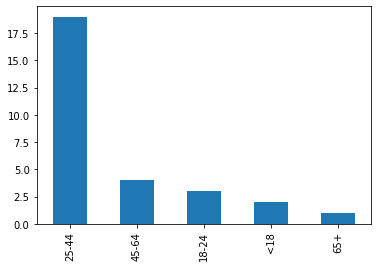

In [56]:
age = violations["susp_age_group"]
print(age)

violations["susp_age_group"].value_counts().plot(kind='bar')

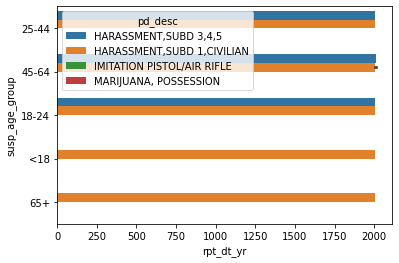

In [57]:
sns.barplot(x = 'rpt_dt_yr', y = age, hue = 'pd_desc', data = violations, estimator = np.min)
plt.show()

Mapping Complaints

In [58]:
import descartes
!pip install geopandas
from shapely.geometry import Point 
!pip install cartopy
%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/e5/92/fe8838fa8158931906dfc4f16c5c1436b3dd2daf83592645b179581403ad/Cartopy-0.17.0.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmp49yklbij Check the logs for full command output.


In [59]:
# Setting Bounding Box for XY Coords
BBox = (violations.longitude.min(), violations.longitude.max(), violations.latitude.min(), violations.latitude.max())
BBox

TypeError: ignored

In [0]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [0]:
# Plot complaints

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(violations.longitude, violations.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Complaints in NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')